In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from sklearn.metrics  import mean_squared_error, mean_absolute_error, r2_score



**Problem 2**

- a) How does income inequality relate to the number of hate crimes and hate incidents? 
- b) How can we predict the number of hate crimes and hate incidents from race/nature of the population? 
- c) How does the number of hate crimes vary across states? Is there any similarity in number of hate incidents (per 100,000 people) between some states than in others — both according to the SPLC after the election and the FBI before it? 

Note: For the first two questions:

Choose the variables which you think are related to the predictors (income inequality, race and nature of the population) to build your model. Justify your selection.
Refine your model iteratively.

In [3]:
#Reading dataset
df_crime = pd.read_csv('~/UW/IMT_574/Week5/Homework/hatecrime.csv')
df_crime.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [4]:
#Checking for missing values to impute
df_crime.isna().any()

state                                       False
median_household_income                     False
share_unemployed_seasonal                   False
share_population_in_metro_areas             False
share_population_with_high_school_degree    False
share_non_citizen                            True
share_white_poverty                         False
gini_index                                  False
share_non_white                             False
share_voters_voted_trump                    False
hate_crimes_per_100k_splc                    True
avg_hatecrimes_per_100k_fbi                  True
dtype: bool

In [5]:
#Imputing NaN values with mean values
mean_value_splc = df_crime['hate_crimes_per_100k_splc'].mean() 
mean_value_fbi = df_crime['avg_hatecrimes_per_100k_fbi'].mean() 
mean_value_non_citizen = df_crime['share_non_citizen'].mean() 

df_crime['hate_crimes_per_100k_splc'].fillna(value=mean_value_splc, inplace=True) 
df_crime['avg_hatecrimes_per_100k_fbi'].fillna(value=mean_value_fbi, inplace=True) 
df_crime['share_non_citizen'].fillna(value=mean_value_non_citizen, inplace=True) 

/var/folders/86/5wwfmlzj2yv_nhxq3c_g6c380000gn/T/ipykernel_4196/1084989171.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_crime['hate_crimes_per_100k_splc'].fillna(value=mean_value_splc, inplace=True)
/var/folders/86/5wwfmlzj2yv_nhxq3c_g6c380000gn/T/ipykernel_4196/1084989171.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

In [6]:
# df2.info()

*Shared functions*

In [7]:
def get_metrics(y_test, y_pred, legend):
    mse = mean_squared_error(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(legend)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")

---

**1) How does income inequality relate to the number of hate crimes and hate incidents?**



Using Linear Regression- Ordinary Least Squares:

Using Gini index as feature of income inequality:

*"The Gini index, also known as the Gini coefficient or Gini ratio, is a statistical measurement of inequality in income, wealth, or consumption within a group or country"*

- Checking the relation between gini_index and hate_crimes_per_100k_splc and avg_hatecrimes_per_100k_fbi

In [8]:
#Adding numeric id column for the states
df_crime['state_id'] = df_crime.index + 1

#Droping alphanumeric variable State
df_crime.drop(['state'],axis=1, inplace = True)

<Axes: title={'center': 'Hate crimes per 100,000 population, FBI = Blue, SLPS = Red'}, xlabel='gini_index', ylabel='avg_hatecrimes_per_100k_fbi'>

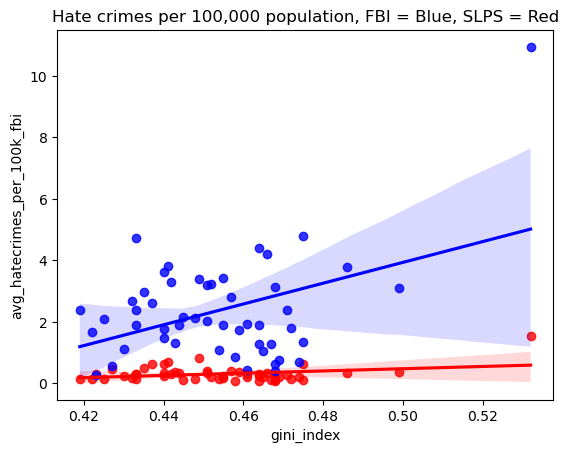

In [9]:

sns.regplot(x='gini_index', y='hate_crimes_per_100k_splc', data=df_crime,  
    color = 'red').set_title('Hate crimes per 100,000 population, FBI = Blue, SLPS = Red')

sns.regplot(x='gini_index', y='avg_hatecrimes_per_100k_fbi', data=df_crime,  
    color = 'blue')

<Axes: >

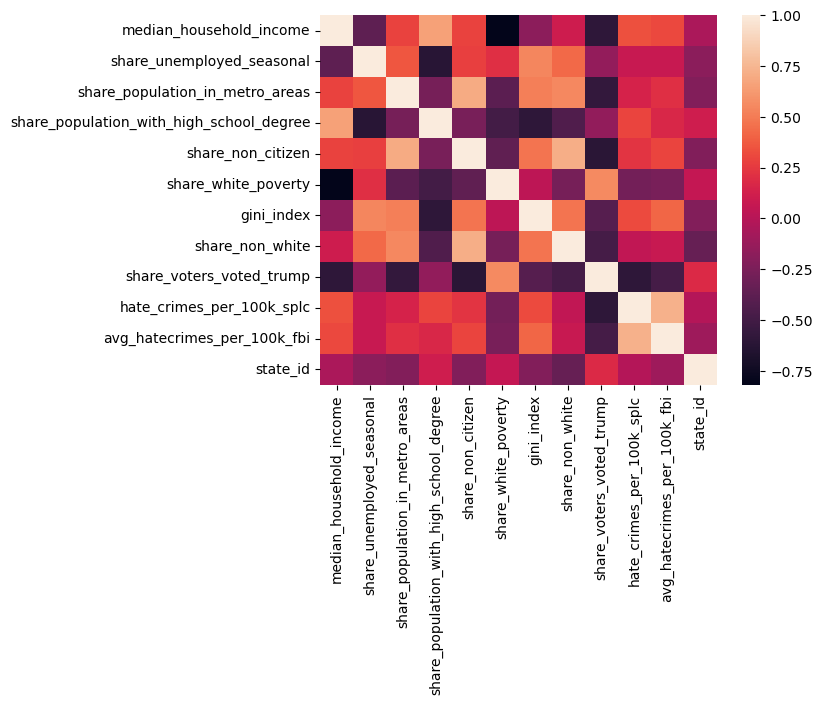

In [10]:
#Checking correlations

corrs = df_crime.corr()

sns.heatmap(corrs)

From the graphs we see that the distributions are not so similar...It appears that the FBI dataset has more dispersion. And from the heatmap, we see that the SPLC data has more correlation to hate crimes than the FBI data. 
Nevertheless,this appears to be because the FBI dataset spans more years than the SPLC dataset, which only takes a short period of time (over a week). Since the hate crimes happened during a brief, specific period of time (US Elections), the SPLC dataset doesn't seem to be representative enough. From here I'll take the FBI data as the variable to predict, or label, instead of the SPLC that is not representational enough.

In [11]:
#Outcome or label variable (Hate Crimes per FBI)
y = df_crime.avg_hatecrimes_per_100k_fbi
#Features or predictor variables
X = df_crime['gini_index']
X=sm.add_constant(X)

In [12]:
#Splitting the dataset in training(70%) and testing (30%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
#Trainig the model
lr_model = sm.OLS(y_train, X_train).fit()

In [13]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     avg_hatecrimes_per_100k_fbi   R-squared:                       0.005
Model:                                     OLS   Adj. R-squared:                 -0.025
Method:                          Least Squares   F-statistic:                    0.1782
Date:                         Sun, 10 Nov 2024   Prob (F-statistic):              0.676
Time:                                 19:58:17   Log-Likelihood:                -55.132
No. Observations:                           35   AIC:                             114.3
Df Residuals:                               33   BIC:                             117.4
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0477      5.361     -0.009      0.993     -10.954      10.859
gini_index     4.9795     11.797      0.422      0.676     -19.022      28.981
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.549
Skew:                           0.443   Prob(JB):                        0.461
Kurtosis:                       2.472   Cond. No.                         69.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Testing the model
y_pred = lr_model.predict(X_test)
get_metrics(y_test, y_pred,"Scores for Linear Regression model to predict the avg_hatecrimes_per_100k_fbi label, using gini_index as feature:")

Scores for Linear Regression model to predict the avg_hatecrimes_per_100k_fbi label, using gini_index as feature:
Mean Squared Error (MSE): 5.660594541880722
Mean Absolute Error (MAE): 1.4225796672290296
R-squared (R2): 0.028660307918847883


If we quickly do the same for the SPLC:

In [15]:
#Outcome or label variable (Hate Crimes per FBI)
y = df_crime.hate_crimes_per_100k_splc

#Features or predictor variables
X = df_crime['gini_index']
X=sm.add_constant(X)

#Splitting the dataset in training(70%) and testing (30%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

#Trainig the model
lr_model_SLPC = sm.OLS(y_train, X_train).fit()

#Testing the model
y_pred_SLPC = lr_model_SLPC.predict(X_test)
get_metrics(y_test, y_pred_SLPC,"Scores for Linear Regression model to predict the hate_crimes_per_100k_splc label, using gini_index as feature:")

Scores for Linear Regression model to predict the hate_crimes_per_100k_splc label, using gini_index as feature:
Mean Squared Error (MSE): 0.162902639428343
Mean Absolute Error (MAE): 0.23404615676455084
R-squared (R2): -0.2959086813752194


***The FBI average appears to give a less accurate prediction than the SPLC model, but overall it will be less prone to overfitting***

For the FBI model, the MSE and MAE is higher than the SLPC model, although the R-Squared decreased. All this tells us that since the SLPC has less representational data, it's accuracy is better, but prone to overfitting and to be less accurate if we test it with data outside that US Election period

---

**2) How can we predict the number of hate crimes and hate incidents from race/nature of the population?**

Using Linear Regression- Ordinary Least Squares:

Using the FBI data, since it is more representational for the aforementioned reasons:

*Using the share_non_white, share_white_poverty, share_non_citizen, share_population_with_high_school_degree, share_population_in_metro_areas as predictors, what we will call by race/nature:*

In [16]:
#Outcome or label variable
y = df_crime.avg_hatecrimes_per_100k_fbi

#Features or predictor variables
X = df_crime[['share_non_white','share_white_poverty','share_population_with_high_school_degree', 'share_population_in_metro_areas' ]]
X= sm.add_constant(X)

In [17]:
#Splitting the dataset in training(70%) and testing (30%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [18]:
#Trainig the model
lr_model_race = sm.OLS(y_train, X_train).fit()

In [19]:
lr_model_race.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     avg_hatecrimes_per_100k_fbi   R-squared:                       0.159
Model:                                     OLS   Adj. R-squared:                  0.047
Method:                          Least Squares   F-statistic:                     1.421
Date:                         Sun, 10 Nov 2024   Prob (F-statistic):              0.251
Time:                                 19:58:17   Log-Likelihood:                -52.191
No. Observations:                           35   AIC:                             114.4
Df Residuals:                               30   BIC:                             122.2
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -8.2677     10.666     -0.775      0.444     -30.050      13.514
share_non_white                             -1.1259      1.627     -0.692      0.494      -4.449       2.198
share_white_poverty                         -2.7535     15.763     -0.175      0.863     -34.946      29.439
share_population_with_high_school_degree    11.5634     10.117      1.143      0.262      -9.099      32.226
share_population_in_metro_areas              1.3993      1.492      0.938      0.356      -1.647       4.446
==============================================================================
Omnibus:                        0.806   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.829
Skew:                           0.192   Prob(JB):                        0.661
Kurtosis:                       2.351   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for *share_population_with_high_school_degree* is very low (p-value=0.005 < alpha=0.05), so we cannot reject the null hyphotesis and we can discard the feature since it's not statistically significant. The rest of the features appear to be statistically significant.

In [20]:
#Resplitting dataset, discarding high school degree data
y = df_crime.avg_hatecrimes_per_100k_fbi
X = df_crime[['share_non_white','share_white_poverty', 'share_population_in_metro_areas' ]]
X= sm.add_constant(X)
#Splitting the dataset in training(70%) and testing (30%) data
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=20)
#Trainig the model
lr_model_race = sm.OLS(y_train, X_train,).fit()
lr_model_race.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     avg_hatecrimes_per_100k_fbi   R-squared:                       0.123
Model:                                     OLS   Adj. R-squared:                  0.038
Method:                          Least Squares   F-statistic:                     1.444
Date:                         Sun, 10 Nov 2024   Prob (F-statistic):              0.249
Time:                                 19:58:17   Log-Likelihood:                -52.937
No. Observations:                           35   AIC:                             113.9
Df Residuals:                               31   BIC:                             120.1
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               3.7638      1.721      2.187      0.036       0.253       7.274
share_non_white                    -2.0640      1.412     -1.462      0.154      -4.944       0.816
share_white_poverty               -15.2384     11.420     -1.334      0.192     -38.530       8.053
share_population_in_metro_areas     0.7024      1.368      0.513      0.611      -2.088       3.493
==============================================================================
Omnibus:                        1.693   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.304
Skew:                           0.263   Prob(JB):                        0.521
Kurtosis:                       2.214   Cond. No.                         76.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
y_pred_race= lr_model_race.predict(X_test)
get_metrics(y_test, y_pred_race,"Scores for Linear Regression model to predict the avg_hatecrimes_per_100k_fbi label, using gini_index as feature:")

Scores for Linear Regression model to predict the avg_hatecrimes_per_100k_fbi label, using gini_index as feature:
Mean Squared Error (MSE): 5.978632375113639
Mean Absolute Error (MAE): 1.4826772451664332
R-squared (R2): -0.02591395432816679


All the  race/nature features taken into consideration (share_non_white,share_white_poverty, share_population_in_metro_areas) appear to be statistically significant to predict the average annual hate crimes per 100,000 population, FBI, 2010-2015. This can also be seeing in the previous heatmap.

---

**3) How does the number of hate crimes vary across states? Is there any similarity in number of hate incidents (per 100,000 people) between some states than in others — both according to the SPLC after the election and the FBI before it?**

*For FBI data:*

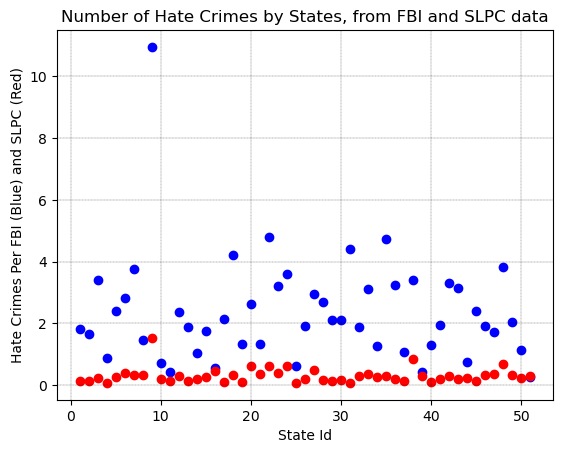

In [22]:
plt.scatter(df_crime.state_id, df_crime.avg_hatecrimes_per_100k_fbi, color = 'b')

plt.scatter(df_crime.state_id, df_crime.hate_crimes_per_100k_splc, color = 'r')

plt.title('Number of Hate Crimes by States, from FBI and SLPC data')
plt.xlabel("State Id")
plt.ylabel("Hate Crimes Per FBI (Blue) and SLPC (Red)")

plt.grid(color = 'k', linestyle = '--', linewidth = 0.2)
plt.show()

From the scatterplot, we see that the distribution of the SLPC data remains flat accross states, while the FBI data appears to be more dispersed accross states. From this graph it appears that the state with more crimes is state_id =9 (District of Columbia)...It appears that there are some states where hate crime is not so rampant, such as Iowa, Pennsylvania, Wyoming and Texas, although there is no visible pattern of why (these states are not geographically neighbors).

*Using K-Means clustering*

In [23]:
# Cluster algorithm using K=4
num_clusters = 4
clusters_k4=KMeans(num_clusters,random_state=30).fit(df_crime)
clusters_k4

KMeans(n_clusters=4, random_state=30)

In [24]:
clusters_k4.labels_

array([2, 1, 3, 2, 0, 0, 1, 0, 1, 3, 3, 1, 0, 0, 3, 0, 0, 2, 2, 3, 1, 1,
       3, 1, 2, 0, 3, 0, 3, 1, 1, 3, 0, 3, 0, 3, 3, 0, 0, 0, 2, 0, 2, 0,
       1, 0, 1, 0, 2, 0, 0], dtype=int32)

In [25]:
#Adding column to datatset with ClusterIds and dropping unnecessary columns
df_crime_clustered=df_crime[['state_id', 'hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']]
df_crime_clustered['cluster_id']=clusters_k4.labels_

/var/folders/86/5wwfmlzj2yv_nhxq3c_g6c380000gn/T/ipykernel_4196/2059141769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crime_clustered['cluster_id']=clusters_k4.labels_


In [26]:
# Compute the centroids for K=4 clusters with 11 variables
print('Centroids for clusters when K=4:')
clusters_k4.cluster_centers_

Centroids for clusters when K=4:


array([[5.70126000e+04, 4.51500000e-02, 7.35500000e-01, 8.79200000e-01,
        5.52291667e-02, 8.75000000e-02, 4.49150000e-01, 2.72500000e-01,
        4.89000000e-01, 3.05494904e-01, 2.05122092e+00, 2.99500000e+01],
       [6.83661818e+04, 4.73636364e-02, 8.50909091e-01, 8.93363636e-01,
        6.81818182e-02, 6.36363636e-02, 4.54363636e-01, 3.82727273e-01,
        3.84545455e-01, 4.23991609e-01, 3.55615053e+00, 2.27272727e+01],
       [4.20137500e+04, 5.87500000e-02, 6.63750000e-01, 8.22875000e-01,
        3.05729167e-02, 1.28750000e-01, 4.64875000e-01, 2.90000000e-01,
        6.08750000e-01, 1.79373349e-01, 1.99470152e+00, 2.50000000e+01],
       [4.90011667e+04, 5.28333333e-02, 7.40000000e-01, 8.60916667e-01,
        5.70486111e-02, 1.00000000e-01, 4.53500000e-01, 3.43333333e-01,
        5.09166667e-01, 2.74995740e-01, 2.05404808e+00, 2.30833333e+01]])

In [27]:
y_pred_k_means= clusters_k4.fit_predict(df_crime_clustered)
y_pred_k_means

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int32)

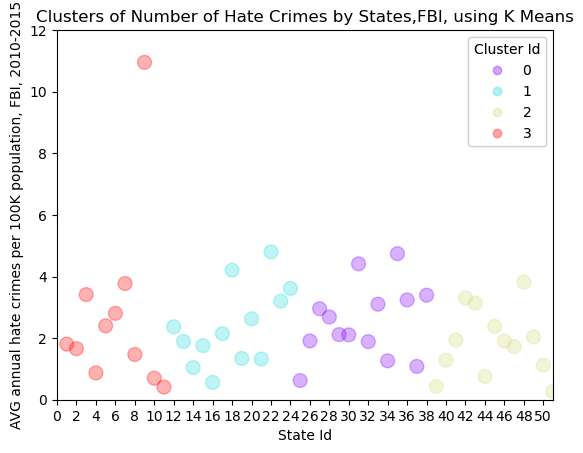

In [28]:
fig, ax = plt.subplots()
plt.xticks(np.arange(0,54,2))
plt.axis([0, 51, 0, 12])
scatter = ax.scatter(df_crime['state_id'], df_crime_clustered['avg_hatecrimes_per_100k_fbi'],c = y_pred_k_means, cmap='rainbow', s=100,
               alpha=0.3)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster Id")

ax.add_artist(legend1)

ax.set_title('Clusters of Number of Hate Crimes by States,FBI, using K Means')
ax.set_xlabel('State Id' )
ax.set_ylabel('AVG annual hate crimes per 100K population, FBI, 2010-2015')


plt.show()

From this grasph, we see that the distribution of heate crimes accross states is diverse. In some states the hate crimes per 100K are higher than other states, and it shoots up through the roof in one case (State Id=9, District of Columbia). 